In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

**11. In Section 7.7, it was mentioned that GAMs are generally fit using
a backfitting approach. The idea behind backfitting is actually quite
simple. We will now explore backfitting in the context of multiple
linear regression.
Suppose that we would like to perform multiple linear regression, but
we do not have software to do so. Instead, we only have software
to perform simple linear regression. Therefore, we take the following
iterative approach: we repeatedly hold all but one coefficient esti-
mate fixed at its current value, and update only that coefficient
estimate using a simple linear regression. The process is continued un-
til convergence—that is, until the coefficient estimates stop changing.
We now try this out on a toy example.**

**(a) Generate a response Y and two predictors X 1 and X 2 , with
n = 100.**

In [3]:
np.random.seed(1)
X1 =  np.random.normal(0.0, 1.0, 100)
X2 =  np.random.normal(0.0, 1.0, 100)
epsilon = np.random.normal(0.0, 1.0, 100)
Y =4 + 2*X1 + 7*X2 + epsilon

**(b) Initialize
ˆ
β 1 to take on a value of your choice. It does not matter
what value you choose.**

In [4]:
beta1_hat = 100

**(c) Keeping
ˆ
β 1 fixed, fit the model
Y −
ˆ
β 1 X 1 = β 0 + β 2 X 2 + ?.
You can do this as follows:**
> a=y-beta1*x1

> beta2=lm(a∼x2)$coef[2]

In [5]:
a = Y - beta1_hat * X1
X2_model = sm.add_constant(X2)
beta2 = sm.OLS(a,X2_model).fit().params[1]

In [6]:
beta2

-1.2224560680701364

**(d) Keeping
ˆ
β 2 fixed, fit the model
Y −
ˆ
β 2 X 2 = β 0 + β 1 X 1 + ?.
You can do this as follows:**
> a=y-beta2*x2

> beta1=lm(a∼x1)$coef[2]

In [7]:
a = Y - beta2 * X2
X1_model = sm.add_constant(X1)
beta1 = sm.OLS(a,X1_model).fit().params[1]

In [8]:
beta1

2.743586723550256

**(e) Write a for loop to repeat (c) and (d) 1,000 times. Report the
estimates of
ˆ
β 0 ,
ˆ
β 1 , and
ˆ
β 2 at each iteration of the for loop.
Create a plot in which each of these values is displayed, with
ˆ
β 0 ,
ˆ
β 1 , and
ˆ
β 2 each shown in a different color.**

In [9]:
X1_model = sm.add_constant(X1)
X2_model = sm.add_constant(X2)
def backfitting_loop(beta1_hat,loop_times = 1000):
    beta1 = beta1_hat
    beta_list = []
    for loop_time in range(loop_times):
        a = Y - beta1 * X1
        beta2 = sm.OLS(a,X2_model).fit().params[1]
        a = Y - beta2 * X2
        beta1 = sm.OLS(a,X1_model).fit().params[1]
        beta0 = sm.OLS(a,X1_model).fit().params[0]
        beta_list.append([beta0,beta1,beta2])
    beta_array = pd.DataFrame(beta_list,columns = ['beta0','beta1','beta2'],index = np.arange(1,loop_times + 1))
    return beta_array
beta_array = backfitting_loop(100,loop_times = 1000)

In [10]:
beta0_array = beta_array['beta0']
beta1_array = beta_array['beta1']
beta2_array = beta_array['beta2']

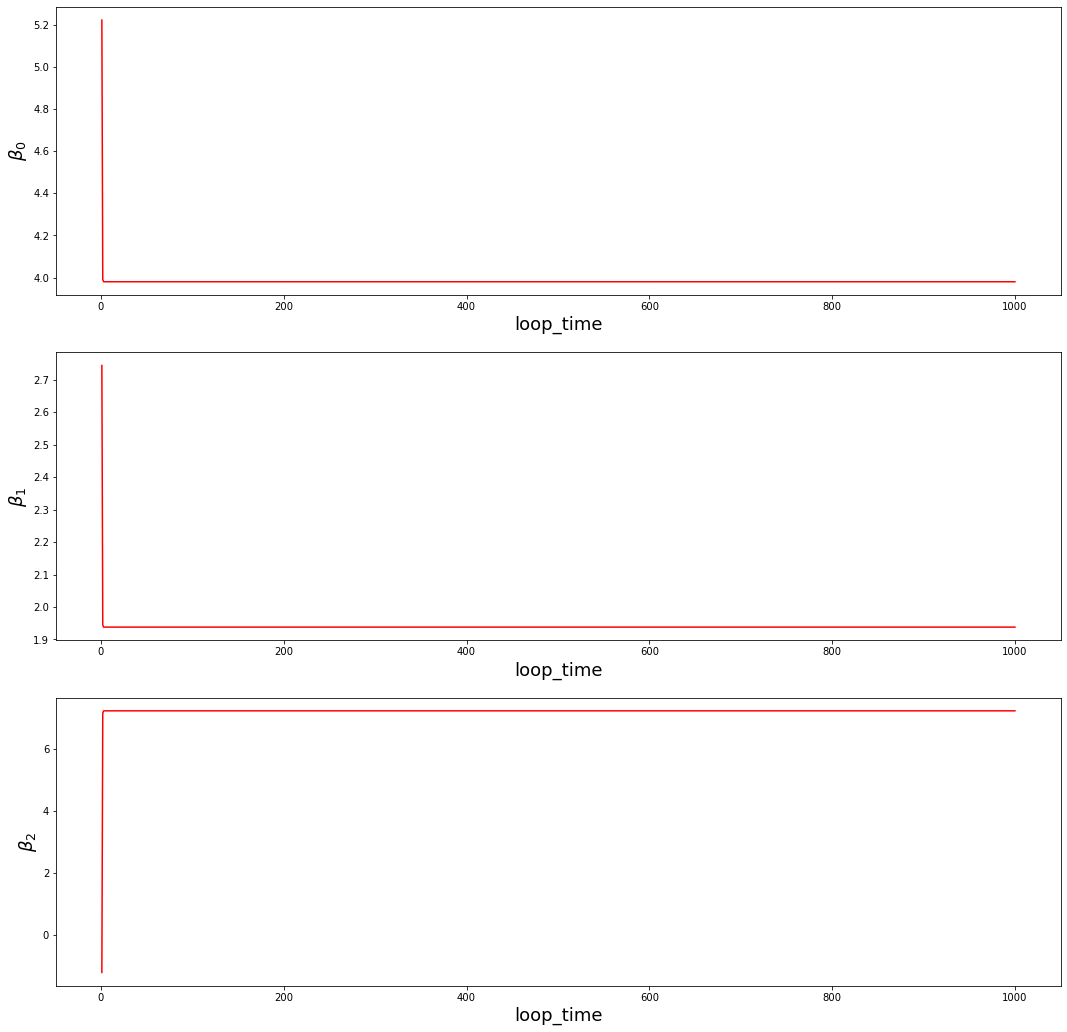

In [11]:
loop_times = np.arange(1,1001)
plt.figure(figsize=(18, 18))
plt.subplot(311)
plt.plot(loop_times,beta0_array,'r-')
plt.xlabel(u"loop_time", fontsize=18)
plt.ylabel(r"$\beta_0$", fontsize=18)
plt.subplot(312)
plt.plot(loop_times,beta1_array,'r-')
plt.xlabel(u"loop_time", fontsize=18)
plt.ylabel(r"$\beta_1$", fontsize=18)
plt.subplot(313)
plt.plot(loop_times,beta2_array,'r-')
plt.xlabel(u"loop_time", fontsize=18)
plt.ylabel(r"$\beta_2$", fontsize=18)
plt.show()

**(f) Compare your answer in (e) to the results of simply performing
multiple linear regression to predict Y using X 1 and X 2 . Use
the abline() function to overlay those multiple linear regression
coefficient estimates on the plot obtained in (e).**

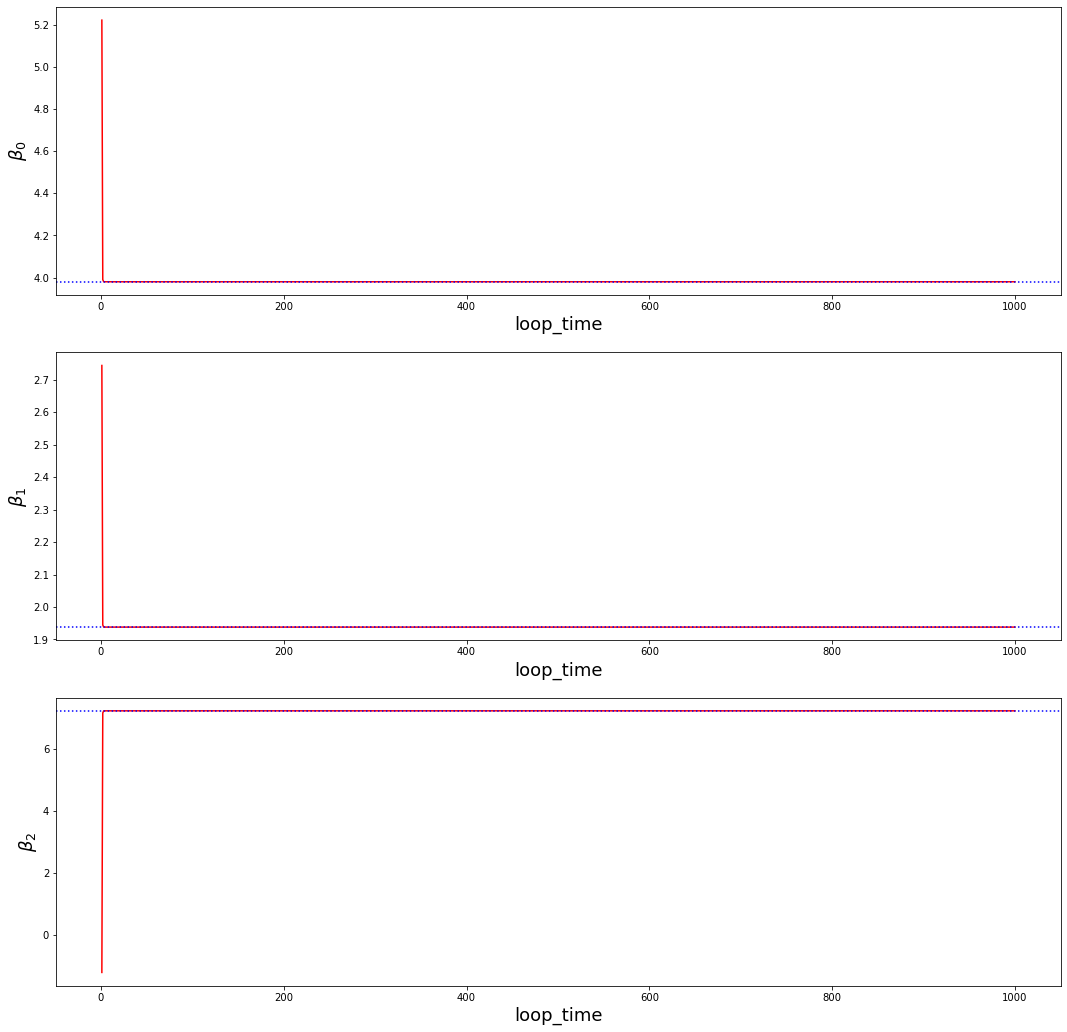

In [12]:
X = np.c_[X1,X2]
X_model = sm.add_constant(X)
beta0_ols = sm.OLS(Y,X_model).fit().params[0]
beta1_ols = sm.OLS(Y,X_model).fit().params[1]
beta2_ols = sm.OLS(Y,X_model).fit().params[2]
plt.figure(figsize=(18,18))
plt.subplot(311)
plt.plot(loop_times,beta0_array,'r-')
plt.axhline(beta0_ols,color = 'b',linestyle = ':')
plt.xlabel(u"loop_time", fontsize=18)
plt.ylabel(r"$\beta_0$", fontsize=18)
plt.subplot(312)
plt.plot(loop_times,beta1_array,'r-')
plt.axhline(beta1_ols,color = 'b',linestyle = ':')
plt.xlabel(u"loop_time", fontsize=18)
plt.ylabel(r"$\beta_1$", fontsize=18)
plt.subplot(313)
plt.plot(loop_times,beta2_array,'r-')
plt.axhline(beta2_ols,color = 'b',linestyle = ':')
plt.xlabel(u"loop_time", fontsize=18)
plt.ylabel(r"$\beta_2$", fontsize=18)
plt.show()

**(g) On this data set, how many backfitting iterations were required
in order to obtain a “good” approximation to the multiple re-
gression coefficient estimates?**

从拟合图上看只需要一次结果便一致